In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

data_folder_path = '/content/drive/MyDrive/Colab Notebooks/Data'

file_path = os.path.join(data_folder_path, 'preprocessed_train.csv')
X = pd.read_csv(file_path)

file_path = os.path.join(data_folder_path, 'Train (1).csv')
train = pd.read_csv(file_path)
y = train['bank_account']

file_path = os.path.join(data_folder_path, 'preprocessed_test.csv')
X_test = pd.read_csv(file_path)

file_path = os.path.join(data_folder_path, 'preprocessed_test.csv')
test_data = pd.read_csv(file_path)

X.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,1.0,0.10,0.095238,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.20,0.642857,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.20,0.119048,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.20,0.214286,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.35,0.119048,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Feature Selection

[9.72672515e-03 3.69281410e-02 3.03742461e-02 1.51078250e-01
 3.50447141e-01 2.33514208e-02 6.58386765e-03 1.68486208e-02
 2.06866281e-03 3.95815236e-03 3.85995803e-03 5.91783310e-03
 7.35269341e-03 2.00846979e-04 1.25754576e-02 1.11420111e-02
 6.13812042e-03 1.60844297e-02 8.87723803e-04 2.31095981e-02
 1.81094361e-02 4.24831647e-02 3.25854762e-02 1.26469236e-03
 9.00349838e-03 3.71239851e-02 4.41215768e-02 5.12927989e-03
 1.32198218e-02 1.64321497e-03 7.84422548e-03 9.96834495e-03
 1.46683930e-02 1.89294886e-02 7.52735472e-03 1.14300878e-02
 6.31405867e-03]


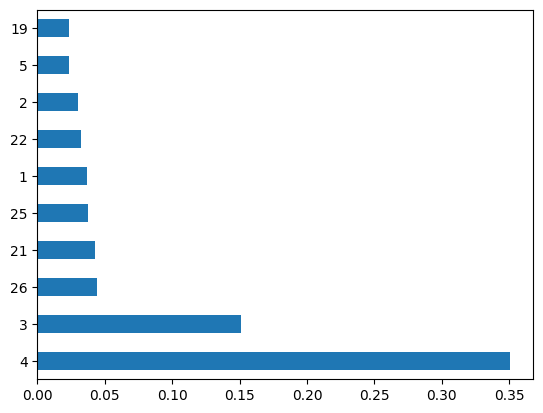

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Model Building

In [18]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()

y = le.fit_transprediction_to_kaggle_formatform(y)

print(y)
X.shape

[1 0 1 ... 0 0 0]


(23524, 37)

In [ ]:
# split the X and Y into 20/80 train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((X, y))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(37,)),  # input layer (1)
    tf.keras.layers.Dense(256, activation='tanh'),  # hidden layer (2)
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(10, activation='sigmoid') # output layer (3)
])

model.compile(optimizer='nadam', # stochastic gradient descent, adam, nadam
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model.summary()
y = y.astype(np.float32)  # Example: Convert y to float32 if needed

model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
2353/2353 [==============================] - 9s 2ms/step - loss: 0.3085 - accuracy: 0.8817
Epoch 2/100
2353/2353 [==============================] - 5s 2ms/step - loss: 0.2904 - accuracy: 0.8841
Epoch 3/100
2353/2353 [==============================] - 5s 2ms/step - loss: 0.2877 - accuracy: 0.8862
Epoch 4/100
2353/2353 [==============================] - 4s 2ms/step - loss: 0.2856 - accuracy: 0.8881
Epoch 5/100
2353/2353 [==============================] - 6s 2ms/step - loss: 0.2842 - accuracy: 0.8869
Epoch 6/100
2353/2353 [==============================] - 5s 2ms/step - loss: 0.2835 - accuracy: 0.8869
Epoch 7/100
2353/2353 [==============================] - 4s 2ms/step - loss: 0.2825 - accuracy: 0.8879
Epoch 8/100
2353/2353 [==============================] - 6s 2ms/step - loss: 0.2807 - accuracy: 0.8879
Epoch 9/100
2353/2353 [==============================] - 5s 2ms/step - loss: 0.2812 - accuracy: 0.8896
Epoch 10/100
2353/2353 [==============================] - 5s 2ms/step - l

In [15]:
# evaluate model
model.evaluate(X_test, y_test)

736/736 [==============================] - 2s 2ms/step - loss: 0.1988 - accuracy: 0.9209


[0.19883237779140472, 0.9208893179893494]

## Predict

In [17]:
def prediction_to_kaggle_format(model, threshold=0.5):
    proba_account = model.predict(X_test, verbose=0)[:,0]
    return pd.DataFrame({
        "unique_id": test_data["uniqueid"],
        "bank_account": (proba_account >= threshold).astype(int)
    })

def make_submission(kaggle_predictions):
    path = os.path.join(data_folder_path, 'financial_inclusion_submission.csv')
    # path="data/tf_lead_submission.csv"
    kaggle_predictions.to_csv(path, index=False)
    print(f"Submission exported to {path}")